# Module 3 #

## Fundamental Analysis Using Regression ##

# Problem 3.1 #

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [231]:
df_gold = pd.read_csv('GOLD.csv')
df_gold

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [232]:
df_gold.Date=pd.to_datetime(df_gold['Date'])

In [233]:
df_gold.set_index("Date" , inplace=True)

In [234]:
df_gold.head()

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [235]:
df_gold.describe()

,Price,Open,High,Low,Pred,new
count,512.000000,512.000000,512.000000,512.000000,411.000000,512.000000
mean,30364.583984,30368.412109,30491.089844,30243.320312,341.712895,245.161859
std,1284.378623,1296.856656,1307.031684,1271.936410,271.075609,205.788897
min,27812.000000,27805.000000,27887.000000,27620.000000,-146.000000,11.109814
25%,29432.500000,29436.750000,29499.750000,29345.750000,156.500000,101.369172
50%,30427.500000,30399.500000,30545.000000,30286.000000,299.000000,184.537244
75%,31271.750000,31300.000000,31447.500000,31160.750000,475.000000,320.835031
max,33753.000000,34247.000000,34400.000000,33680.000000,2210.000000,1407.321485


In [236]:
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 512 entries, 2017-05-04 to 2019-05-03
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     512 non-null    int64  
 1   Open      512 non-null    int64  
 2   High      512 non-null    int64  
 3   Low       512 non-null    int64  
 4   Vol.      512 non-null    object 
 5   Change %  512 non-null    object 
 6   Pred      411 non-null    float64
 7   new       512 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 36.0+ KB


In [237]:
# So there is null values in Pred Columns 
# Just replace 
df_gold_2 = df_gold.dropna().copy()
df_gold_2

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
2018-12-04,30964,30874,31085,30874,0.08K,0.57%,-31.0,301.615081
2018-12-05,30926,30830,30970,30825,0.04K,-0.12%,72.0,241.475101
2018-12-06,31005,31039,31196,30974,10.55K,0.26%,35.0,188.222186


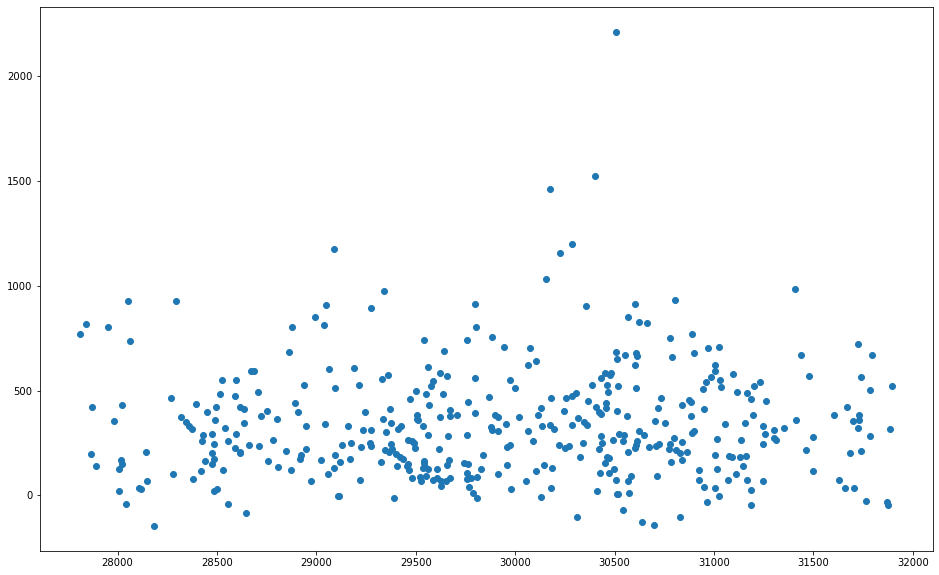

In [238]:
plt.figure(figsize=(16,10))
plt.scatter(df_gold_2['Price'] , df_gold_2['Pred'])
plt.show()

In [239]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score , accuracy_score

X= np.array(df_gold_2['Pred']).reshape(-1,1)
y=np.array(df_gold_2['new']).reshape(-1,1)
#y2=np.array(df_gold_2['new']).reshape(-1,1)

In [240]:
# As we are not sure which column is of linear combination or from polynomial regression

In [241]:
x=df_gold_2[['Price' , 'Open' , 'High' , 'Low']]
y1=df_gold_2['Pred']
y2=df_gold_2['new']

In [242]:
lr1=LinReg()
lr1.fit(x,y1)
y1_pred=lr1.predict(x)
mse1=mean_squared_error(y1_pred , y1)

In [243]:
mse1

1.418441241973479e-22

In [244]:
lr2=LinReg()
lr2.fit(x,y2)
y2_pred=lr2.predict(x)
mse2=mean_squared_error(y2_pred , y2)
mse2

0.23745919032591892

In [245]:
mse1 > mse2

False

Applied Linear Regression and compared predicted values with given 'Pred' and 'new' column and we found that RMSE values
is lesser for 'Pred ' column so 'Pred' column is predicted using Linear Regression and 'new' is with Polynomial.

In [246]:
# Again verifying this 
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(x) 
  
poly.fit(X_poly, y2) 
lin_new = LinReg() 
lin_new.fit(X_poly, y2)

LinearRegression()

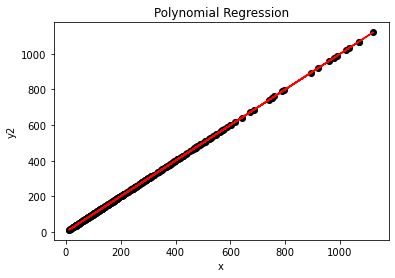

In [247]:
plt.scatter(y2  ,lin_new.predict(poly.fit_transform(x)) , color='black' ) 
plt.plot(y2, lin_new.predict(poly.fit_transform(x)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('x') 
plt.ylabel('y2') 
  
plt.show()

In [248]:
y1_pred

array([ 738., -146.,   30.,  357.,  124.,  149.,  167.,   22.,   34.,
        420.,  234.,  345.,  265.,  138.,  378.,  413.,  214.,  121.,
        491.,  397.,  404.,  222.,   -3.,  259.,  344.,  906.,  526.,
        174.,  685.,  329.,  592.,  205.,  292.,  150.,  420.,  -42.,
        -82.,  262.,   23.,  173.,  550.,  928.,  804.,  -39.,  927.,
        205.,  771.,  818.,  420.,  142.,  199.,  432.,   71.,  101.,
        465.,  350.,  322.,  121.,  361.,  436.,  202.,  551.,  224.,
        486.,  247.,  398.,  316.,  117.,  333.,  364.,  242.,  329.,
        340.,  804.,  512.,   -4.,  230.,  602.,  129.,  168., 1177.,
        333.,   73.,  740.,  286.,   12., 1459., 1158.,  258.,  336.,
        238.,  706.,  339.,  384.,  374.,  471.,  612.,   45.,   83.,
        548.,   85.,  620.,  754.,  409.,  372.,  483.,  196.,  554.,
        318.,  359.,   82.,   38.,  147.,   79.,  393.,  -13.,  432.,
        333.,   67.,  164.,  498.,  228.,  574.,  310.,  238.,  302.,
        811.,  160.,

In [249]:
# Now updating entire "Pred" Column
x=df_gold[['Price' , 'Open' , 'High' , 'Low']]
y=df_gold['new']

In [250]:
lr=LinReg()
lr.fit(x,y)
df_gold['Updated_Pred']=lr1.predict(x)
df_gold

,Price,Open,High,Low,Vol.,Change %,Pred,new,Updated_Pred
Date,,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740,738.0
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176,-146.0
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714,30.0
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064,357.0
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318,124.0
...,...,...,...,...,...,...,...,...,...
2019-04-26,31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322,535.0
2019-04-30,31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158,438.0
2019-05-01,31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305,269.0


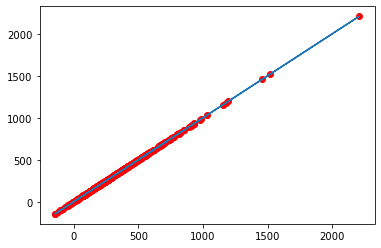

In [251]:
plt.plot(df_gold['Pred'],df_gold['Updated_Pred'])
plt.scatter(df_gold['Pred'],df_gold['Updated_Pred'] , color='r')

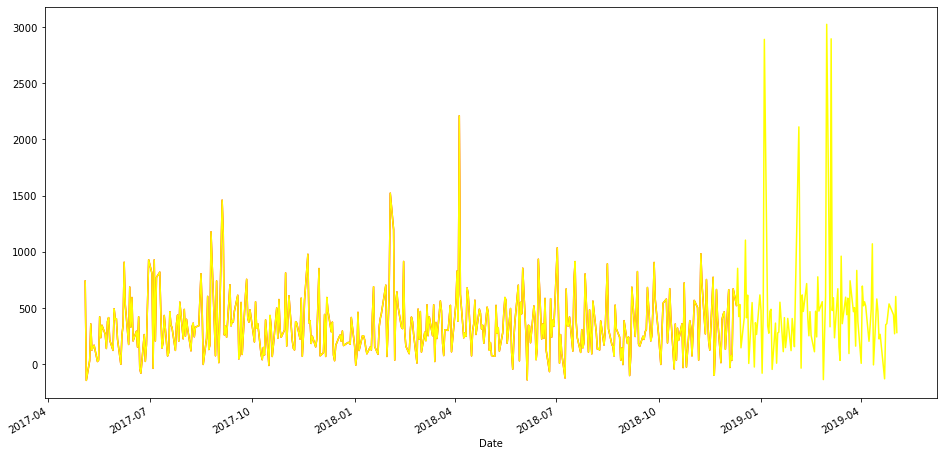

In [252]:
plt.figure(figsize=(16,8))
df_gold['Pred'].plot(color='r')
df_gold['Updated_Pred'].plot(color='yellow')
plt.show()

# Problem 3.2#

In [253]:
# Loading HEROMOTOCO stock data
hero= pd.read_csv('HEROMOTOCO.csv')
hero = hero[hero['Series']=='EQ']
hero.Date=pd.to_datetime(hero['Date'])
hero.set_index(hero['Date'])

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2017-05-15,HEROMOTOCO,EQ,2017-05-15,3541.50,3541.0,3558.00,3504.60,3518.00,3515.45,3519.65,215587,7.587906e+08,17129,110769,51.38
2017-05-16,HEROMOTOCO,EQ,2017-05-16,3515.45,3529.5,3631.80,3491.10,3623.00,3619.40,3561.42,372398,1.326266e+09,33654,147610,39.64
2017-05-17,HEROMOTOCO,EQ,2017-05-17,3619.40,3615.0,3683.95,3595.05,3634.10,3645.95,3651.06,338342,1.235308e+09,27003,160855,47.54
2017-05-18,HEROMOTOCO,EQ,2017-05-18,3645.95,3600.0,3639.00,3577.05,3586.00,3592.05,3602.46,294013,1.059170e+09,23822,143430,48.78
2017-05-19,HEROMOTOCO,EQ,2017-05-19,3592.05,3597.0,3656.00,3533.75,3565.00,3571.65,3593.06,270446,9.717284e+08,26291,113208,41.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,HEROMOTOCO,EQ,2019-05-07,2531.30,2567.9,2568.00,2521.50,2529.00,2527.35,2546.23,347427,8.846276e+08,29584,129747,37.35
2019-05-08,HEROMOTOCO,EQ,2019-05-08,2527.35,2525.8,2540.85,2481.60,2496.00,2499.70,2515.26,406025,1.021259e+09,32136,176406,43.45
2019-05-09,HEROMOTOCO,EQ,2019-05-09,2499.70,2499.0,2555.00,2490.60,2540.00,2537.75,2536.33,585480,1.484972e+09,40511,203100,34.69


In [254]:
# Loading NIFTY50 index data
nft=pd.read_csv('NIFTY50.csv')
nft.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [255]:
nft.set_index(nft['Date'])

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,,
15-May-2017,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
16-May-2017,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
17-May-2017,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
18-May-2017,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
19-May-2017,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
...,...,...,...,...,...,...,...
07-May-2019,07-May-2019,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
08-May-2019,08-May-2019,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
09-May-2019,09-May-2019,11322.40,11357.60,11255.05,11301.80,373028059,17602.86


In [256]:
hero['Day_Perc_Change']=hero["Close Price"].pct_change()
nft['Day_Perc_Change'] = nft['Close'].pct_change()
hero

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change
0,HEROMOTOCO,EQ,2017-05-15,3541.50,3541.0,3558.00,3504.60,3518.00,3515.45,3519.65,215587,7.587906e+08,17129,110769,51.38,NaN
1,HEROMOTOCO,EQ,2017-05-16,3515.45,3529.5,3631.80,3491.10,3623.00,3619.40,3561.42,372398,1.326266e+09,33654,147610,39.64,0.029569
2,HEROMOTOCO,EQ,2017-05-17,3619.40,3615.0,3683.95,3595.05,3634.10,3645.95,3651.06,338342,1.235308e+09,27003,160855,47.54,0.007335
3,HEROMOTOCO,EQ,2017-05-18,3645.95,3600.0,3639.00,3577.05,3586.00,3592.05,3602.46,294013,1.059170e+09,23822,143430,48.78,-0.014784
4,HEROMOTOCO,EQ,2017-05-19,3592.05,3597.0,3656.00,3533.75,3565.00,3571.65,3593.06,270446,9.717284e+08,26291,113208,41.86,-0.005679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,HEROMOTOCO,EQ,2019-05-07,2531.30,2567.9,2568.00,2521.50,2529.00,2527.35,2546.23,347427,8.846276e+08,29584,129747,37.35,-0.001560
490,HEROMOTOCO,EQ,2019-05-08,2527.35,2525.8,2540.85,2481.60,2496.00,2499.70,2515.26,406025,1.021259e+09,32136,176406,43.45,-0.010940
491,HEROMOTOCO,EQ,2019-05-09,2499.70,2499.0,2555.00,2490.60,2540.00,2537.75,2536.33,585480,1.484972e+09,40511,203100,34.69,0.015222
492,HEROMOTOCO,EQ,2019-05-10,2537.75,2535.0,2560.00,2500.05,2506.05,2507.30,2529.09,332771,8.416086e+08,23272,118956,35.75,-0.011999


In [257]:
# Past 3 months data
nft_past_3=nft[434:]
hero_past_3=hero[434:]

In [258]:
nft_past_3.describe()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_Perc_Change
count,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000,60.000000
mean,11331.186667,11374.157500,11269.158333,11319.546667,3.610810e+08,17742.023333,0.000332
std,370.839250,367.227373,368.735312,367.034553,8.675688e+07,3487.700273,0.006838
min,10636.700000,10722.850000,10585.650000,10604.350000,2.460062e+08,13209.710000,-0.013473
25%,10918.475000,10981.100000,10848.775000,10962.787500,2.979050e+08,14976.060000,-0.004559
50%,11468.750000,11513.450000,11391.650000,11450.975000,3.497380e+08,17394.980000,-0.001025
75%,11648.012500,11685.337500,11573.512500,11628.375000,3.837234e+08,19084.900000,0.005824
max,11856.150000,11856.150000,11738.500000,11787.150000,6.441590e+08,28254.300000,0.012975


In [259]:
hero_past_3.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,6.000000e+01,60.000000,6.000000e+01,60.000000,60.000000
mean,2654.925833,2659.828333,2685.665000,2619.992500,2648.003333,2647.790833,2652.538833,7.639665e+05,2.022848e+09,49350.283333,3.337252e+05,42.353167,-0.002508
std,98.573181,98.681788,99.090826,87.376846,94.057499,93.010196,92.064986,3.278513e+05,8.571104e+08,18065.726555,2.037637e+05,11.062352,0.015150
min,2499.700000,2499.000000,2537.500000,2477.000000,2496.000000,2499.700000,2515.260000,3.139020e+05,7.911003e+08,23272.000000,1.042970e+05,20.830000,-0.035388
25%,2579.262500,2589.237500,2603.275000,2546.350000,2577.087500,2575.387500,2579.105000,5.656442e+05,1.483865e+09,35640.500000,2.021082e+05,34.705000,-0.012072
50%,2637.025000,2649.950000,2661.675000,2603.050000,2630.500000,2632.475000,2624.380000,7.215800e+05,1.894647e+09,46269.500000,3.049170e+05,40.705000,-0.002700
75%,2731.537500,2733.637500,2758.812500,2686.250000,2717.487500,2716.900000,2715.920000,8.870425e+05,2.392006e+09,57743.000000,3.855522e+05,50.402500,0.005694
max,2938.850000,2915.000000,2915.950000,2804.550000,2897.050000,2889.050000,2880.790000,2.007440e+06,5.267490e+09,111435.000000,1.202023e+06,75.870000,0.044868


In [260]:
import statsmodels.api as sm

In [261]:
X=hero_past_3['Day_Perc_Change'].dropna()
y=nft_past_3['Day_Perc_Change'].dropna()

In [262]:
X = sm.add_constant(X)  # Adding a constant term to the predictor
est=sm.OLS(y,X).fit()
est.summary()
# Reference ::  https://www.datarobot.com/blog/ordinary-least-squares-in-python/
# https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Day_Perc_Change   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     7.172
Date:                Fri, 31 Jul 2020   Prob (F-statistic):            0.00962
Time:                        15:00:32   Log-Likelihood:                 217.98
No. Observations:                  60   AIC:                            -432.0
Df Residuals:                      58   BIC:                            -427.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0007      0.001      0.831      0.410      -0.001       0.002
Day_Perc_Change     0.1497      0.056      2.678      0.010       0.038       0.262
==============================================================================
Omnibus:                        1.982   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                1.409
Skew:                           0.138   Prob(JB):                        0.494
Kurtosis:                       2.302   Cond. No.                         66.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**So, Daily Beta value for past 3 Months = 0.1497** 

In [263]:
monthly_returns=pd.DataFrame()
monthly_returns['HEROMOTOCO']=hero.groupby(hero['Date'].dt.strftime('%B'))['Close Price'].sum().sort_values()
monthly_returns['NIFTY50']=nft.groupby(hero['Date'].dt.strftime('%B'))['Close'].sum().sort_values()

In [264]:
monthly_returns

,HEROMOTOCO,NIFTY50
Date,,
March,118382.80,409447.35
February,122674.65,416805.80
April,128247.40,441594.20
October,134209.20,420833.55
December,135834.40,422014.10
September,138439.35,412883.30
November,139155.30,439580.45
May,146354.20,449720.60
January,146486.90,485583.05


In [265]:
monthly_returns_pct=monthly_returns.pct_change()
monthly_returns_pct

,HEROMOTOCO,NIFTY50
Date,,
March,NaN,NaN
February,0.036254,0.017972
April,0.045427,0.059472
October,0.046487,-0.047013
December,0.012109,0.002805
September,0.019177,-0.021636
November,0.005172,0.064660
May,0.051733,0.023068
January,0.000907,0.079744


In [266]:
# Labeling dependent and independent variable
predictor=monthly_returns_pct['HEROMOTOCO'].dropna()
response=monthly_returns_pct['NIFTY50'].dropna()

predictor= sm.add_constant(predictor)  # Added a constant term to the predictor

#regression model 
estimate = sm.OLS(response , predictor)

# fit model and print results
results = estimate.fit()
results.summary()

c:\users\ramesh patel\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                NIFTY50   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                    0.4990
Date:                Fri, 31 Jul 2020   Prob (F-statistic):              0.498
Time:                        15:00:32   Log-Likelihood:                 18.132
No. Observations:                  11   AIC:                            -32.26
Df Residuals:                       9   BIC:                            -31.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0212      0.028      0.767      0.463      -0.041       0.084
HEROMOTOCO    -0.6442      0.912     -0.706      0.498      -2.707       1.419
==============================================================================
Omnibus:                        1.597   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.450   Jarque-Bera (JB):                0.781
Skew:                          -0.052   Prob(JB):                        0.677
Kurtosis:                       1.699   Cond. No.                         58.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**So, Monthly Beta values is -0.6442.**

### Both Daily and Monthly Beta value are less than 1 ##
### Daily Beta value = 0.1497 , this indicates that stock is less volatile than market 
#### Monthly Beta Value is negative which indicates that the stock's returns tend to move in the opposite direction 
#### of the market's returns.
**A stock with a beta of −3 would see its return decline 9% (on average) when the market's return goes up 3%, and would see its return climb 9% (on average) if the market's return falls by 3%.**

**In general, high beta means high risk, but also offers the possibility of high returns if the stock turns out to be a good investment. A negative beta coefficient, on the other hand, means the investment moves opposite of market direction.**